In [1]:
import pandas
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [2]:
L = [f"../data/Big/chartevents_20230706_{i}_labeled.csv" for i in range(330)]

In [3]:
df = pandas.concat((pandas.read_csv(i, engine='python', dtype={"label":bool}) for i in L), ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6463400 entries, 0 to 6463399
Data columns (total 9 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   hadm_id                                object 
 1   charttime                              object 
 2   Heart Rate                             float64
 3   Respiratory Rate                       float64
 4   Non Invasive Blood Pressure systolic   float64
 5   Non Invasive Blood Pressure diastolic  float64
 6   O2 saturation pulseoxymetry            float64
 7   Temperature Celsius                    float64
 8   label                                  bool   
dtypes: bool(1), float64(6), object(2)
memory usage: 400.7+ MB


In [4]:
mark = (
        "Heart Rate", \
        "Respiratory Rate", \
        "Non Invasive Blood Pressure systolic", \
        "Non Invasive Blood Pressure diastolic", \
        "O2 saturation pulseoxymetry", \
        "Temperature Celsius"
)
df.dropna(how='any', inplace=True)
df_under, df_under_label = df[list(mark)], df.label

In [5]:
print("Before\t", sum(df_under_label) / len(df_under_label))
df_under_resample, df_under_label_resample = RandomUnderSampler(sampling_strategy='majority').fit_resample(df_under, df_under_label)
print("After \t", sum(df_under_label_resample) / len(df_under_label_resample))

Before	 0.0007234156171054704
After 	 0.5


In [6]:
df_under_resample = (df_under_resample - df_under_resample.mean()) / df_under_resample.std()
df_under_resample.sample(5)

,Heart Rate,Respiratory Rate,Non Invasive Blood Pressure systolic,Non Invasive Blood Pressure diastolic,O2 saturation pulseoxymetry,Temperature Celsius
1451,0.442490,0.257727,-1.885937,-1.062920,0.027907,-0.517051
1836,1.657668,0.257727,-0.605197,0.542418,0.542238,-0.461957
1716,-0.269856,-0.266969,0.035173,0.653131,0.439372,-0.090071
1246,1.364349,1.175946,1.165238,1.538835,0.130773,0.033891
423,1.196739,-0.004621,0.637875,0.431705,0.233639,0.116532


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_under_resample, df_under_label_resample, test_size=0.2, stratify=df_under_label_resample)
len(X_train), len(X_test)

(1521, 381)

[Text(0.5, 0.875, 'x[4] <= -0.438\ngini = 0.5\nsamples = 1521\nvalue = [761, 760]'),
 Text(0.25, 0.625, 'x[4] <= -1.484\ngini = 0.157\nsamples = 163\nvalue = [14, 149]'),
 Text(0.125, 0.375, 'x[3] <= 0.535\ngini = 0.027\nsamples = 73\nvalue = [1, 72]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 57\nvalue = [0, 57]'),
 Text(0.1875, 0.125, 'gini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.375, 0.375, 'x[1] <= 0.71\ngini = 0.247\nsamples = 90\nvalue = [13, 77]'),
 Text(0.3125, 0.125, 'gini = 0.361\nsamples = 55\nvalue = [13, 42]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(0.75, 0.625, 'x[2] <= -1.427\ngini = 0.495\nsamples = 1358\nvalue = [747, 611]'),
 Text(0.625, 0.375, 'x[3] <= -0.461\ngini = 0.18\nsamples = 70\nvalue = [7, 63]'),
 Text(0.5625, 0.125, 'gini = 0.114\nsamples = 66\nvalue = [4, 62]'),
 Text(0.6875, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.875, 0.375, 'x[0] <= 0.841\ngini = 0.489\nsamples = 1288\nvalue = [740, 548

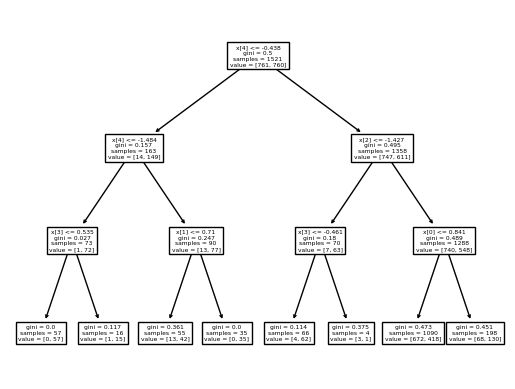

In [64]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train, y_train)
tree.plot_tree(model)

In [65]:
from graphviz import Source
features = list(mark)
dot_data = tree.export_graphviz(model, feature_names=features)
graph = Source(dot_data)
graph.render(view=True, format="pdf", filename="../Charts/Big")

'../Charts/Big.pdf'

In [66]:
model.score(X_test, y_test)

0.6902887139107612

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold

In [68]:
scores = 0
for i in range(100):
    scores += cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy').mean()
print(f"{round(scores, 2)}%")

65.59%


In [69]:
cross_val_score(tree.DecisionTreeClassifier(max_depth=3), df_under_resample, df_under_label_resample, cv=5, scoring='accuracy').mean()

0.6172399502693742

In [70]:
A_x = X_test[y_test==True]
A_y = y_test[y_test==True]
A_x.size

1146

In [71]:
model.score(A_x, A_y)

0.5026178010471204

In [72]:
1146-954

192

In [73]:
B_x = X_test[y_test==False]
B_y = y_test[y_test==False]
B_x.size

1140

In [74]:
model.score(B_x, B_y)

0.8789473684210526

In [79]:
y_test = y_test.values

In [90]:
df_under_resample.shape

(1902, 6)

In [95]:
y_pred = model.predict_proba(X_test)[:, 1]

In [96]:
from sklearn import metrics
metrics.roc_auc_score(y_test, y_pred)

0.7026315789473684

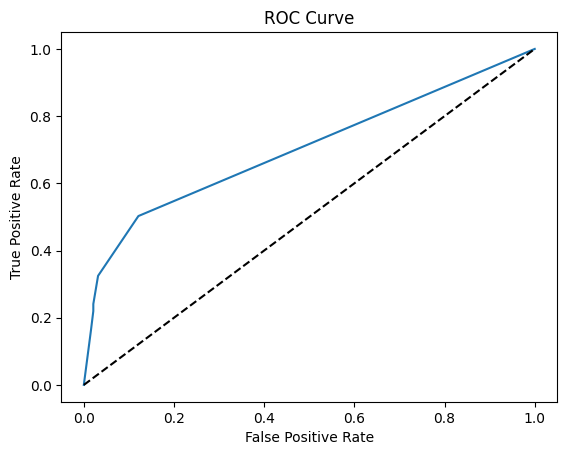

In [97]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  # 繪製對角線（隨機猜測的效果）
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=0)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.7979002624671916

In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=10, random_state=0), df_under_resample, df_under_label_resample, cv=5, scoring='accuracy')
print(scores.mean())

0.6713855504903992


In [30]:
imp = rfc.feature_importances_
imp

array([0.16566029, 0.08105579, 0.20956774, 0.17799351, 0.20281548,
       0.16290718])